# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Notebooks specific imports
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic useful imports
import re
import time
import yaml
from pprint import pprint
from pathlib import Path
import h5py
from datetime import datetime, timedelta

# Data manipulation
import numpy as np
from scipy.special import erf
from scipy.integrate import quad

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import (Circle, RegularPolygon, FancyArrowPatch, ArrowStyle)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullFormatter)
import matplotlib.colors as colors

# From AMSOS_analysis.py
import alens_analysis as aa
from alens_analysis.colormaps import register_cmaps

# Locations
ws_path = Path('/home/alamson/DATA/Chromatin/')
mnt_path = Path.home() / 'projects/DATA/Chromatin/'
ceph_path = Path.home() / 'ceph/DATA/Chromatin/'


OPENMP DISPLAY ENVIRONMENT BEGIN
  _OPENMP = '201511'
  OMP_DYNAMIC = 'FALSE'
  OMP_NESTED = 'FALSE'
  OMP_NUM_THREADS = '32'
  OMP_SCHEDULE = 'DYNAMIC'
  OMP_PROC_BIND = 'FALSE'
  OMP_PLACES = ''
  OMP_STACKSIZE = '0'
  OMP_WAIT_POLICY = 'PASSIVE'
  OMP_THREAD_LIMIT = '4294967295'
  OMP_MAX_ACTIVE_LEVELS = '1'
  OMP_CANCELLATION = 'FALSE'
  OMP_DEFAULT_DEVICE = '0'
  OMP_MAX_TASK_PRIORITY = '0'
  OMP_DISPLAY_AFFINITY = 'FALSE'
  OMP_AFFINITY_FORMAT = 'level %L thread %i affinity %A'
OPENMP DISPLAY ENVIRONMENT END

OPENMP DISPLAY ENVIRONMENT BEGIN
  _OPENMP = '201307'
  OMP_DYNAMIC = 'FALSE'
  OMP_NESTED = 'FALSE'
  OMP_NUM_THREADS = '32'
  OMP_SCHEDULE = 'DYNAMIC'
  OMP_PROC_BIND = 'FALSE'
  OMP_PLACES = ''
  OMP_STACKSIZE = '140416920387584'
  OMP_WAIT_POLICY = 'PASSIVE'
  OMP_THREAD_LIMIT = '4294967295'
  OMP_MAX_ACTIVE_LEVELS = '1'
  OMP_CANCELLATION = 'FALSE'
  OMP_DEFAULT_DEVICE = '0'
OPENMP DISPLAY ENVIRONMENT END


### Style settings

In [2]:
graph_sty = {
    "axes.titlesize": 20,
    "axes.labelsize": 24,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    "xtick.labelsize": 24,
    "ytick.labelsize": 24,
    "font.size": 20,
    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)
        

In [3]:
def thread_num(h5_data):
    ydict = yaml.safe_load(h5_data.attrs['RunConfig'])
    return int(ydict['threads'])

def get_param(h5_data, param, attr_str='RunConfig', ptype=float):
    ydict = yaml.safe_load(h5_data.attrs[attr_str])
    return ptype(ydict[param])

def get_protein_param(h5_data, prot_param, prot_tag=0, ptype=float):
    ydict = yaml.safe_load(h5_data.attrs['ProteinConfig'])
    return ptype(ydict['proteins'][prot_tag][prot_param])

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
    

# Line/Rouse mode testing

## 512 line scan dt.001-.1

### dt0.1

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_line512_scan5.1_dt.001-.1/simulations/dt0.100/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

#Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)



### dt0.030

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_line512_scan5.1_dt.001-.1/simulations/dt0.030/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

### dt0.01

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_line512_scan5.1_dt.001-.1/simulations/dt0.010/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

### dt0.003

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_line512_scan5.1_dt.001-.1/simulations/dt0.003/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

### dt0.001

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_line512_scan5.1_dt.001-.1/simulations/dt0.001/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS line scan dt.001-.1

### dt0.1

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_RS_line512_scan5.1_dt.001-.1/simulations/dt0.100/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

#Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
#fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=80)



### dt0.030

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_RS_line512_scan5.1_dt.001-.1/simulations/dt0.030/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
#fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

### dt0.01

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_RS_line512_scan5.1_dt.001-.1/simulations/dt0.010/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
#fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

### dt0.003

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_RS_line512_scan5.1_dt.001-.1/simulations/dt0.003/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

In [ ]:
# Graphing
#make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
#fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
#fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=100)

### dt0.001

In [ ]:
data_path = (ceph_path /"21-04-23_AMchr1_RS_line512_scan5.1_dt.001-.1/simulations/dt0.001/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    mode_mat = get_rouse_modes(com_arr)
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS $l_o=0$ line

In [ ]:
data_path = (ceph_path /"21-04-29_AMchr1_RS_line512_lo0/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_total_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=20)

## 512 RS $l_o=0$ line equil

In [ ]:
data_path = (ceph_path /"21-05-07_AMchr1_RS_line512eq_lo0/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    
    ##com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS $l_o=0, k_l=36.50$ line

In [1]:
data_path = (ceph_path /"21-04-29_AMchr1_RS_line512_lo0_kl36.50/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

NameError: name 'ceph_path' is not defined

## 512 RS $l_o=0, k_l=36.50$ line equil

In [ ]:
data_path = (ceph_path /"21-05-05_AMchr1_RS_line512_lo0_kl36.50/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    
log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS $l_o=0, k_l=36.50, dt=.003$ line equil

In [ ]:
data_path = (ceph_path /"21-05-05_AMchr1_RS_line512_lo0_kl36.50_dt.003/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    #mode_mat = get_rouse_modes(com_arr)

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS $l_o=0, k_l=36.50, dt=.0001, \eta=1.0$ line equil

In [ ]:
data_path = (ceph_path /"21-05-11_AMchr1_RS_line512eq_lo0_kl36.50_visc1.0/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    #mode_mat = get_rouse_modes(com_arr)

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=40)

## 512 RS $l_o=0, k_l=36.50, dt=.0001, \eta=1.0, ts=.1$ line equil

In [ ]:
data_path = (ceph_path /"21-05-12_AMchr1_RS_line512eq_lo0_kl36.50_visc1.0_ts.1/")
ss_ind = 0
with h5py.File(next(data_path.glob('*.h5')), 'r+') as h5_data:
    time_arr = h5_data['time'][ss_ind:]
    sy_dat = h5_data['raw_data']['sylinders'][:,:,ss_ind:]
    nbeads = com_arr.shape[0]
    com_arr = .5 * (sy_dat[:, 2:5, :] + sy_dat[:, 5:8, :])
    #mode_mat = get_rouse_modes(com_arr)

log_contact_avg_mat = aa.get_time_avg_contact_mat(com_arr, avg_block_step = 4)
mode_mat = get_rouse_modes(com_arr)

# Graphing
fig0, ax0 = make_segment_distr_graphs(com_arr, [], [0,1], 1,2)
fig1, ax1 = aa.make_min_distr_plots(com_arr, log_contact_avg_mat, rel_ind=0, hist_max=1.)
fig2, ax2 = make_rouse_analysis_plots(time_arr, mode_mat, nbeads, max_ind=50)

# Time/core testing

[<HDF5 file "OMP1.h5" (mode r+)>, <HDF5 file "OMP2.h5" (mode r+)>, <HDF5 file "OMP3.h5" (mode r+)>, <HDF5 file "OMP4.h5" (mode r+)>, <HDF5 file "OMP8.h5" (mode r+)>]


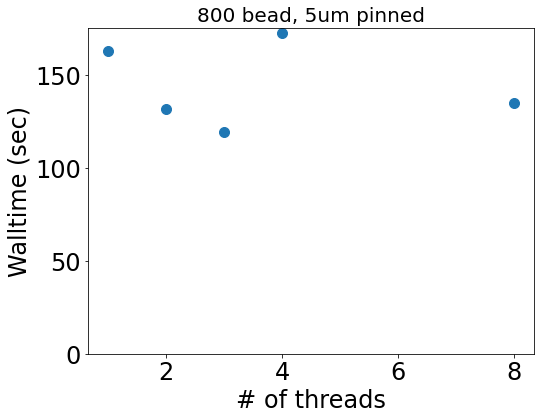

In [43]:
data_path = ws_path / "22-04_aL_time_testing/aLchr1_line800_5umconf_eq/simulations"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=thread_num)
    threads = [thread_num(h5d) for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(threads, wtimes)
    _ = ax.set_xlabel('# of threads')
    _ = ax.set_ylabel('Walltime (sec)')

    _ = ax.set_title('800 bead, 5um pinned')
    _ = ax.set_ylim(0)
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "OMP1.h5" (mode r+)>, <HDF5 file "OMP2.h5" (mode r+)>, <HDF5 file "OMP3.h5" (mode r+)>, <HDF5 file "OMP4.h5" (mode r+)>, <HDF5 file "OMP8.h5" (mode r+)>]


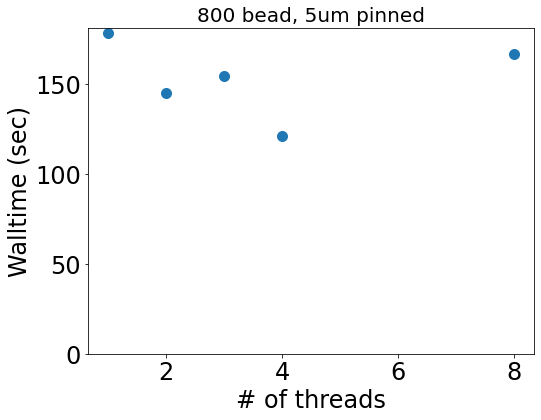

In [42]:
data_path = ws_path / "22-04_aL_time_testing/aLchr1_line800_eq/simulations"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=thread_num)
    threads = [thread_num(h5d) for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(threads, wtimes)
    _ = ax.set_xlabel('# of threads')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('800 bead, free')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[PosixPath('/mnt/home/alamson/ceph/DATA/Chromatin/22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations/OMP1'), PosixPath('/mnt/home/alamson/ceph/DATA/Chromatin/22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations/OMP2'), PosixPath('/mnt/home/alamson/ceph/DATA/Chromatin/22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations/OMP3'), PosixPath('/mnt/home/alamson/ceph/DATA/Chromatin/22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations/OMP4'), PosixPath('/mnt/home/alamson/ceph/DATA/Chromatin/22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations/OMP8')]
[<HDF5 file "s5.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s4.h5" (mode r+)>, <HDF5 file "s3.h5" (mode r+)>, <HDF5 file "s2.h5" (mode r+)>, <HDF5 file "s5.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s4.h5" (mode r+)>, <HDF5 file "s3.h5" (mode r+)>, <HDF5 file "s2.h5" (mode r+)>, <HDF5 file "s5.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 

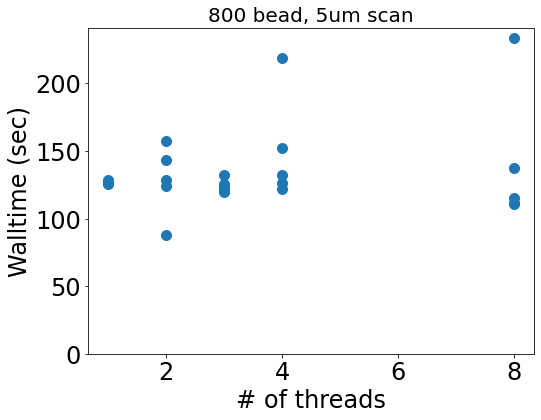

In [62]:
data_path = ceph_path / "22-04_aL_time_testing/aLchr1_scan.5_line800_5umconf_eq/simulations"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:
    omp_path_lst = sorted(data_path.glob('OMP*'),key=lambda x: int(re.match('OMP([0-9])*',str(x.name))[1]))
    print(omp_path_lst)

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('**/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=thread_num)
    threads = [thread_num(h5d) for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(threads, wtimes)
    _ = ax.set_xlabel('# of threads')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('800 bead, 5um scan')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "OMP1.h5" (mode r+)>, <HDF5 file "OMP2.h5" (mode r+)>, <HDF5 file "OMP3.h5" (mode r+)>, <HDF5 file "OMP4.h5" (mode r+)>, <HDF5 file "OMP8.h5" (mode r+)>]


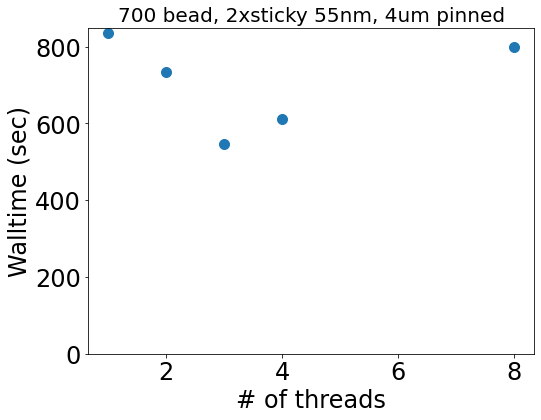

In [53]:
data_path = ws_path / "22-04_aL_time_testing/aLchr1_line700_2xsticky55nm_4um_eq/simulations"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=thread_num)
    threads = [thread_num(h5d) for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(threads, wtimes)
    _ = ax.set_xlabel('# of threads')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('700 bead, 2xsticky 55nm, 4um pinned')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "OMP1.h5" (mode r+)>, <HDF5 file "OMP2.h5" (mode r+)>, <HDF5 file "OMP3.h5" (mode r+)>, <HDF5 file "OMP4.h5" (mode r+)>, <HDF5 file "OMP8.h5" (mode r+)>]


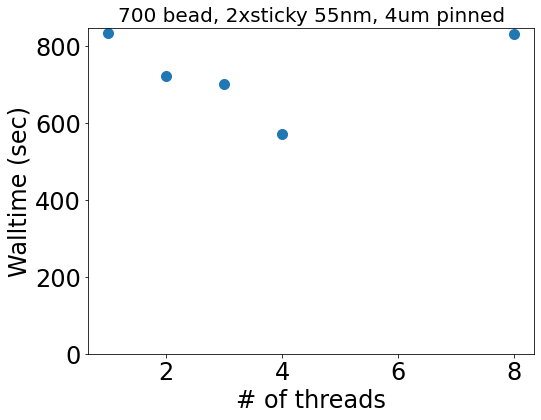

In [54]:
data_path = ws_path / "22-04_aL_time_testing/aLchr1_line700_2xsticky55nm_4um_eq_rng2345/simulations"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=thread_num)
    threads = [thread_num(h5d) for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(threads, wtimes)
    _ = ax.set_xlabel('# of threads')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('700 bead, 2xsticky 55nm, 4um pinned')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>, <HDF5 file "Ls0.h5" (mode r+)>]


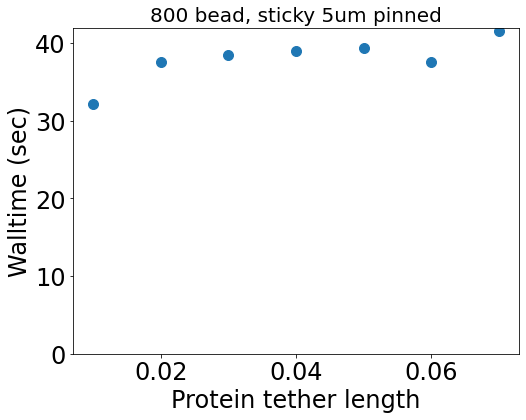

In [14]:
data_path = ws_path / "22-04_aL_time_testing/aLchr1_scan7.1_line800_stickyL.01-.07_eps1_Ke0_5umconf/simulations/"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_protein_param(x, 'freeLength', ptype=float))
    param = [get_protein_param(h5d, 'freeLength') for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(param, wtimes)
    _ = ax.set_xlabel('Protein tether length')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('800 bead, sticky 5um pinned')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>, <HDF5 file "s1.h5" (mode r+)>]


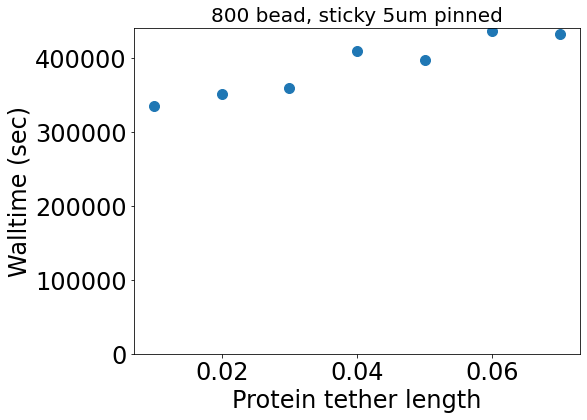

In [12]:
data_path = ceph_path / "22-04-15_aLchr1_scan7.12_line800_stickyL.01-.07_eps1_Ke30_5umconf/simulations/"
ss_ind = 1
#fig, axarr = plt.subplots(2,3, figsize=(24,14))
fig, ax = plt.subplots(figsize=(8,6))
time_fmt = '%H:%M:%S.%f'
try:

    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in data_path.glob('*/s1/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_protein_param(x, 'freeLength', ptype=float))
    param = [get_protein_param(h5d, 'freeLength') for h5d in h5_data_lst]
    wtimes = [h5d.attrs['total_seconds'] for h5d in h5_data_lst]
    #wts_sec = [timedelta(hours=time_ob.hour, minutes=time_ob.minute, seconds=time_ob.second, microseconds=time_ob.microsecond).total_seconds()
    #                for time_ob in wtimes]
    _ = ax.scatter(param, wtimes)
    _ = ax.set_xlabel('Protein tether length')
    _ = ax.set_ylabel('Walltime (sec)')
    _ = ax.set_title('800 bead, sticky 5um pinned')
    _ = ax.set_ylim(0)

except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

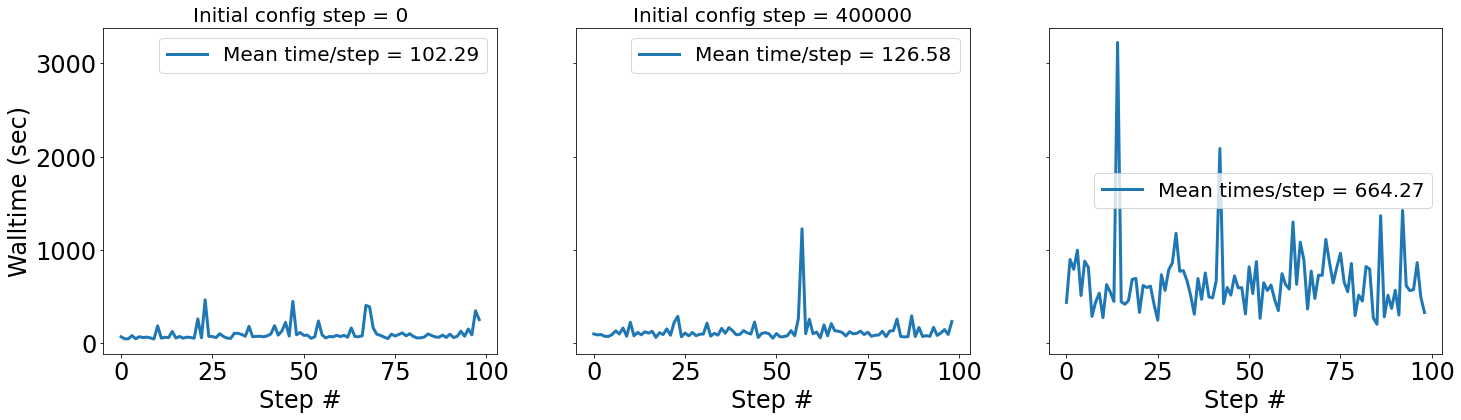

In [36]:
# test_path = '/home/alamson/DATA/Chromatin/22-04-15_aLchr1_scan.12_line800_sticky55nm_eps1_Ka30_4umconf/simulations/s1/run.log'
fig, axarr = plt.subplots(1,3, figsize=(24, 6 ), sharey=True)

test_path = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core/runlog.out'
test_path_equil = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core_equil/runlog.out'
test_path_end = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core_end/runlog.out'
timesteps = aa.runlog_funcs.get_wt_timestep(test_path)
timesteps_eq = aa.runlog_funcs.get_wt_timestep(test_path_equil)
timesteps_end = aa.runlog_funcs.get_wt_timestep(test_path_end)
_ = axarr[0].set_title('Initial config step = 0')
_ = axarr[0].plot(timesteps, label = f'Mean time/step = {timesteps.mean():.2f}')
_ = axarr[1].set_title('Initial config step = 200000')
_ = axarr[1].plot(timesteps_eq, label = f'Mean time/step = {timesteps_eq.mean():.2f}')
_ = axarr[1].set_title('Initial config step = 400000')
_ = axarr[2].plot(timesteps_end, label = f'Mean times/step = {timesteps_end.mean():.2f}')


for ax in axarr:
    _ = ax.set_xlabel("Step #")
    _ = ax.legend()
_ = axarr[0].set_ylabel("Walltime (sec)")



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


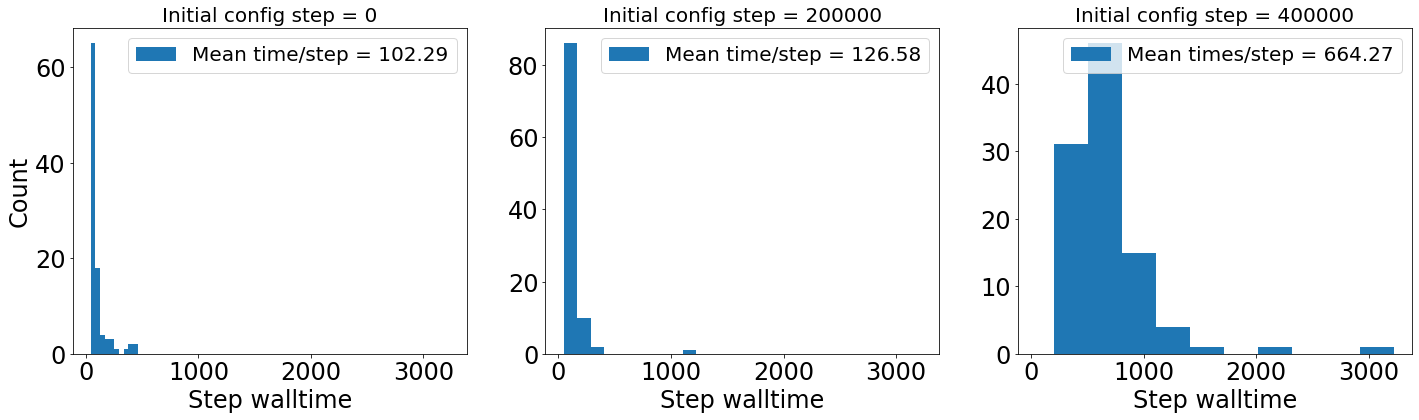

In [4]:
# test_path = '/home/alamson/DATA/Chromatin/22-04-15_aLchr1_scan.12_line800_sticky55nm_eps1_Ka30_4umconf/simulations/s1/run.log'
fig, axarr = plt.subplots(1,3, figsize=(24, 6 ), sharex=True)

test_path = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core/runlog.out'
test_path_equil = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core_equil/runlog.out'
test_path_end = Path.home() / 'ceph/PaperFigs/FigALENS/L025_100k_K5Fast_Sph_1Core_end/runlog.out'
timesteps = aa.runlog_funcs.get_wt_timestep(test_path)
timesteps_eq = aa.runlog_funcs.get_wt_timestep(test_path_equil)
timesteps_end = aa.runlog_funcs.get_wt_timestep(test_path_end)
_ = axarr[0].set_title('Initial config step = 0')
_ = axarr[0].hist(timesteps, label = f'Mean time/step = {timesteps.mean():.2f}')
_ = axarr[1].set_title('Initial config step = 200000')
_ = axarr[1].hist(timesteps_eq, label = f'Mean time/step = {timesteps_eq.mean():.2f}')
_ = axarr[2].set_title('Initial config step = 400000')
_ = axarr[2].hist(timesteps_end, label = f'Mean times/step = {timesteps_end.mean():.2f}')


for ax in axarr:
    _ = ax.set_xlabel("Step walltime")
    _ = ax.legend()
_ = axarr[0].set_ylabel("Count")



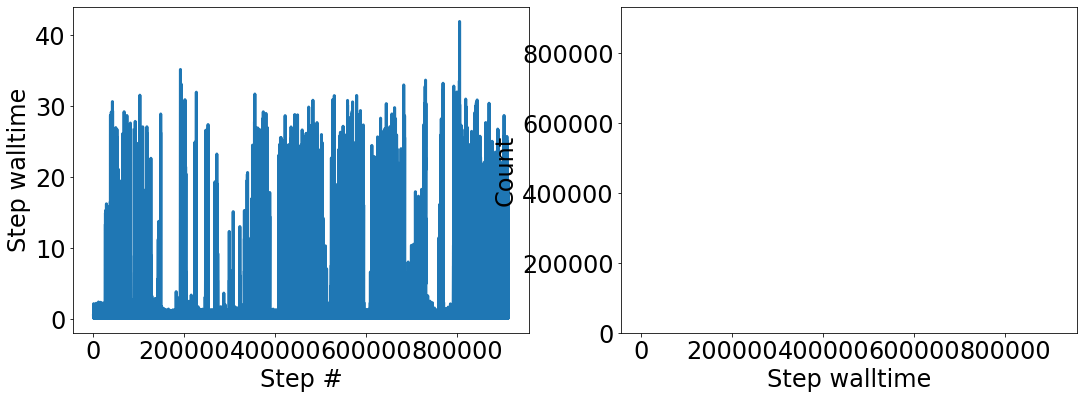

In [5]:
# test_path = '/home/alamson/DATA/Chromatin/22-04-15_aLchr1_scan.12_line800_sticky55nm_eps1_Ka30_4umconf/simulations/s1/run.log'
fig, axarr = plt.subplots(1,2, figsize=(18, 6 ), sharex=True)

test_path = Path.home() / 'ceph/DATA/Chromatin/22-07-06_aLc1_line262144_hilbert_confRad3um_256/outrunLog.1481149.1481149.4294967294.worker5111.out'
timesteps = aa.runlog_funcs.get_wt_timestep(test_path)
_ = axarr[0].plot(timesteps)
_ = axarr[1].hist(timesteps, label = f'Mean time/step = {timesteps.mean():.2f}')
_ = axarr[0].set_xlabel("Step #")
_ = axarr[0].set_ylabel("Step walltime")
_ = axarr[1].set_xlabel("Step walltime")
_ = axarr[1].set_ylabel("Count")



[ 0.486  0.183  0.18  ...  0.163  0.162 18.611]


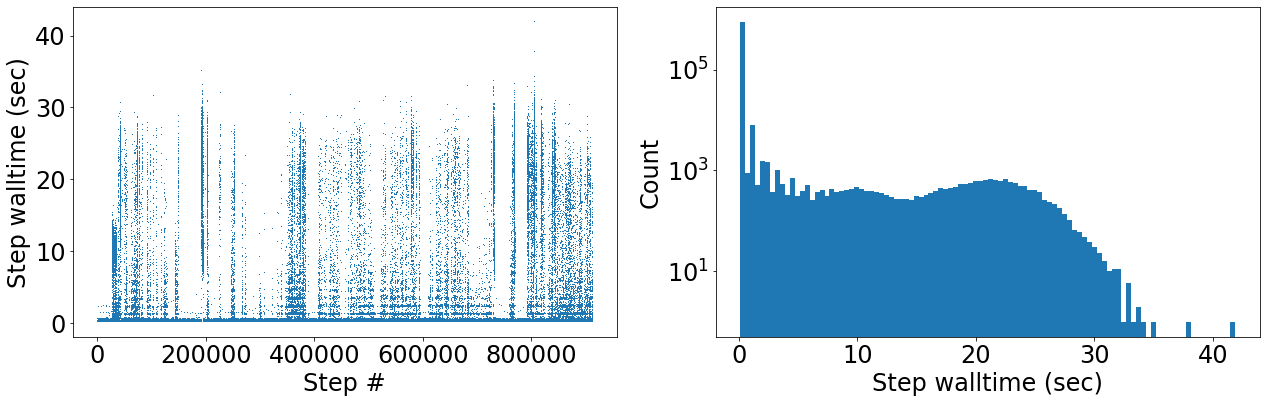

In [20]:
# test_path = '/home/alamson/DATA/Chromatin/22-04-15_aLchr1_scan.12_line800_sticky55nm_eps1_Ka30_4umconf/simulations/s1/run.log'
fig, axarr = plt.subplots(1,2, figsize=(18, 6 ))

#test_path = Path.home() / 'ceph/DATA/Chromatin/22-07-06_aLc1_line262144_hilbert_confRad3um_256/outrunLog.1481149.1481149.4294967294.worker5111.out'
#timesteps = aa.runlog_funcs.get_wt_timestep(test_path)
print(timesteps)
_ = axarr[0].plot(timesteps, marker=',', linestyle=" ")
_ = axarr[1].hist(timesteps, label = f'Mean time/step = {timesteps.mean():.2f}', bins=100)
_ = axarr[0].set_xlabel("Step #")
_ = axarr[0].set_ylabel("Step walltime (sec)")
_ = axarr[1].set_xlabel("Step walltime (sec)")
_ = axarr[1].set_ylabel("Count")
_ = axarr[1].set_yscale("log")

fig.tight_layout()



[0.116 0.173 0.113 ... 0.114 0.115 0.115]


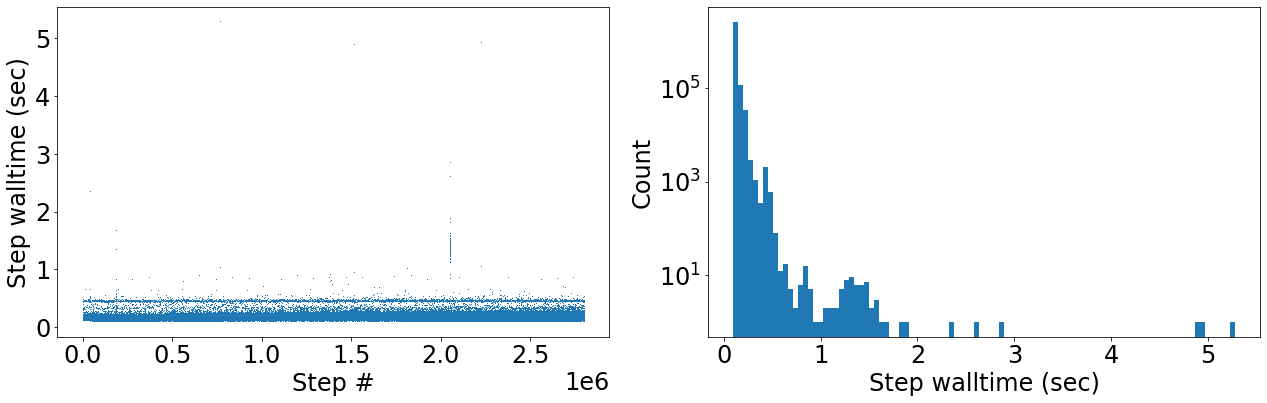

In [21]:
fig, axarr = plt.subplots(1,2, figsize=(18, 6 ))

test_path = Path.home() / 'ceph/DATA/Chromatin/22-07-15_aLc1_line16000_100umconf/outrunLog.1490342.1490342.4294967294.worker2057.out'
timesteps = aa.runlog_funcs.get_wt_timestep(test_path)
print(timesteps)
_ = axarr[0].plot(timesteps, marker=',', linestyle=" ")
_ = axarr[1].hist(timesteps, label = f'Mean time/step = {timesteps.mean():.2f}', bins=100)
_ = axarr[0].set_xlabel("Step #")
_ = axarr[0].set_ylabel("Step walltime (sec)")
_ = axarr[1].set_xlabel("Step walltime (sec)")
_ = axarr[1].set_ylabel("Count")
_ = axarr[1].set_yscale("log")

fig.tight_layout()



# Flexible filament link length testing

## Klink $3650$

In [9]:
length_test_path = ceph_path / '22-04_aL_time_testing/aLchr1_scan.5_line200_dt1em2-1em6/simulations/'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-06.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


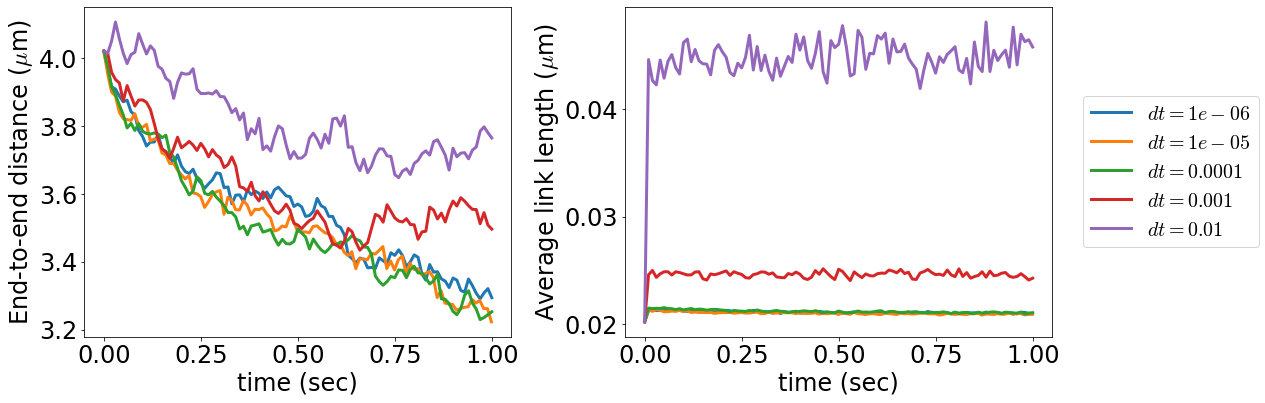

In [10]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=0)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(time_arr, avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    for ax in axarr:
        _ = ax.set_xlabel('time (sec)')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-06.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


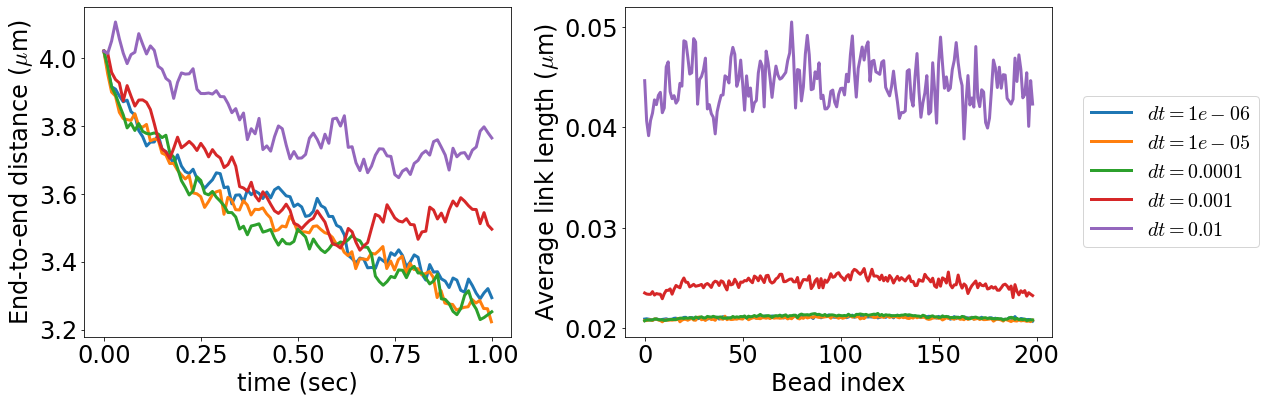

In [11]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=1)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(range(avg_stretch.size), avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    _ = axarr[0].set_xlabel('time (sec)')
    _ = axarr[1].set_xlabel('Bead index')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

## Klink $10^5$

In [12]:
length_test_path = ceph_path / '22-04_aL_time_testing/aLchr1_scan.5_line200_Klink1e5_dt1em2-1em6/simulations/'

[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


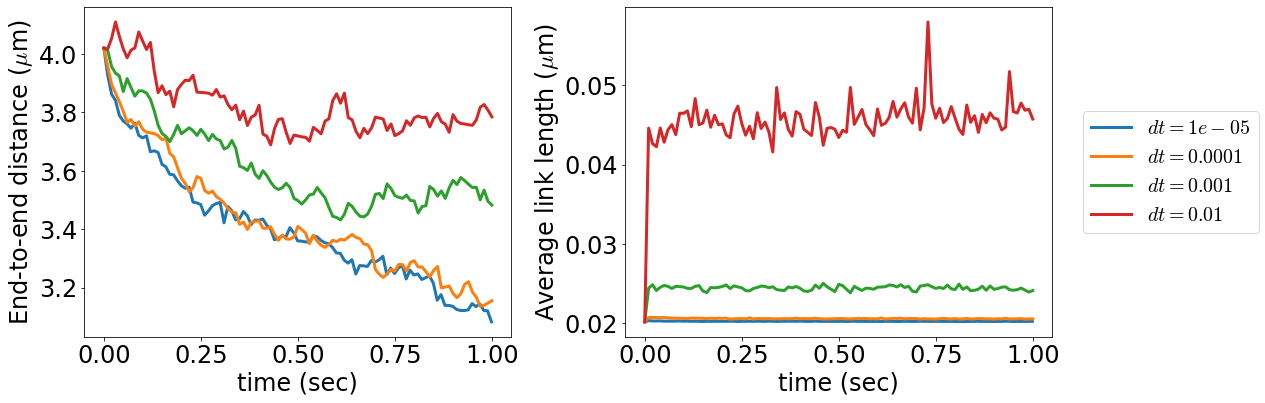

In [13]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=0)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(time_arr, avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    for ax in axarr:
        _ = ax.set_xlabel('time (sec)')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


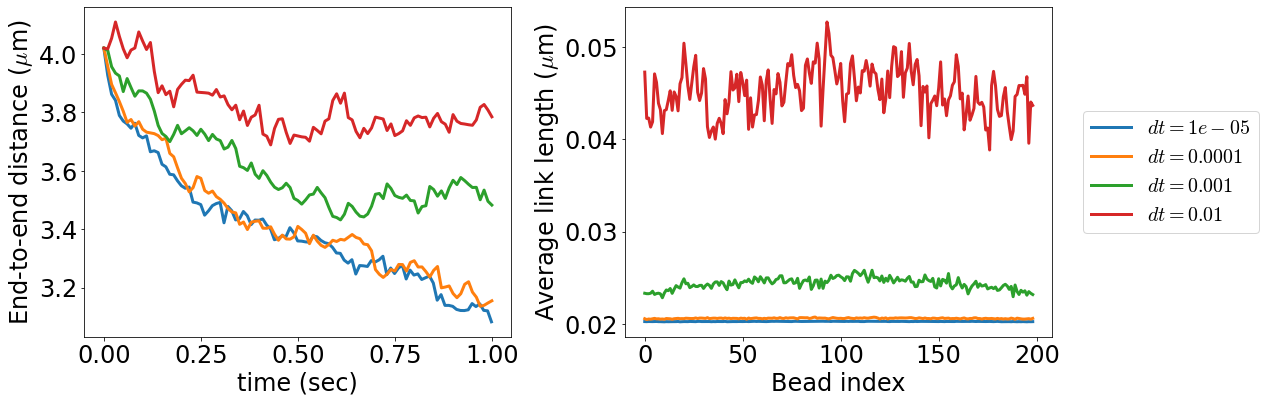

In [14]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=1)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(range(avg_stretch.size), avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    _ = axarr[0].set_xlabel('time (sec)')
    _ = axarr[1].set_xlabel('Bead index')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

## Klink $10^2$

In [15]:
length_test_path = ceph_path / '22-04_aL_time_testing/aLchr1_scan.5_line200_Klink1e2_dt1em2-1em6/simulations/'

[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


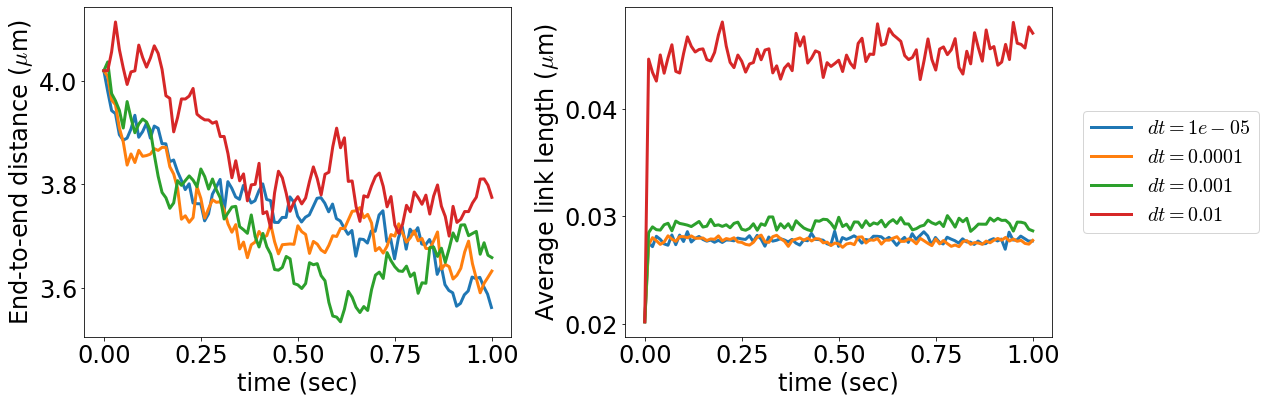

In [16]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=0)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(time_arr, avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    for ax in axarr:
        _ = ax.set_xlabel('time (sec)')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

[<HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>, <HDF5 file "dt1e-05.h5" (mode r+)>, <HDF5 file "dt0.h5" (mode r+)>]


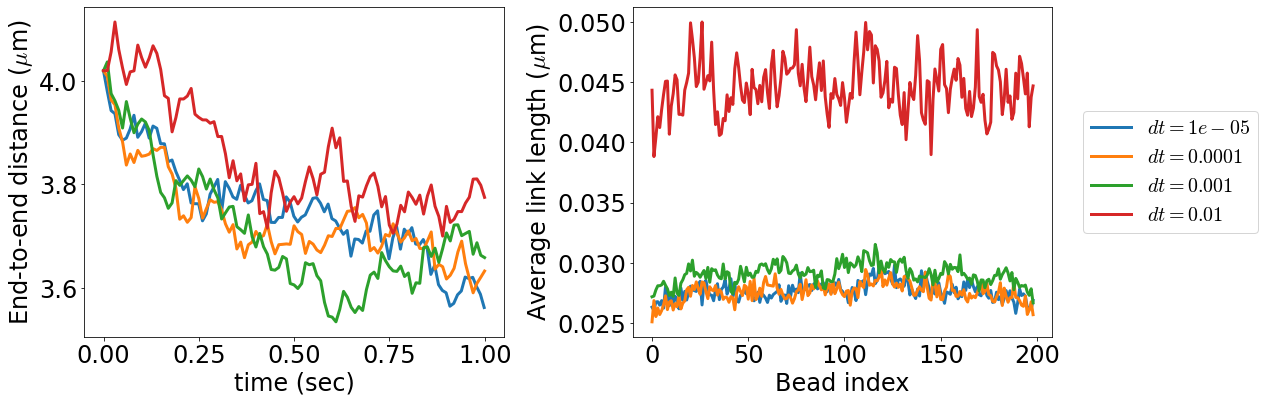

In [17]:
t_start = 0
t_end = None
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
try:
    h5_data_lst = [h5py.File(h5p, 'r+') for h5p in length_test_path.glob('dt*/analysis/*.h5')]
    print(h5_data_lst)
    h5_data_lst.sort(key=lambda x: get_param(x, 'dt'))
    for h5_data in h5_data_lst:
        sy_dat = h5_data['raw_data']['sylinders'][...]
        com_arr = .5 * (sy_dat[:, 2:5, t_start:t_end] + sy_dat[:, 5:8, t_start:t_end])
        time_arr = h5_data['time'][t_start:t_end]
        end_sep_arr = np.linalg.norm(com_arr[0,:,:] - com_arr[-1,:,:], axis=0)
        bead_sep_arr = np.linalg.norm(com_arr[0:-1,:,:] - com_arr[1:,:,:], axis=1)
        avg_stretch = bead_sep_arr.mean(axis=1)
        _ = axarr[0].plot(time_arr, end_sep_arr, label=get_param(h5_data, 'dt'))
        _ = axarr[1].plot(range(avg_stretch.size), avg_stretch, label=f'$dt = {float(get_param(h5_data, "dt")):.1g}$')
  
    _ = axarr[0].set_xlabel('time (sec)')
    _ = axarr[1].set_xlabel('Bead index')
    _ = axarr[0].set_ylabel('End-to-end distance ($\mu$m)')
    _ = axarr[1].set_ylabel('Average link length ($\mu$m)')
    _ = axarr[1].legend(loc='center left', bbox_to_anchor=(1.05, .5))
    fig.tight_layout()
except:
    raise
finally:
    for h5d in h5_data_lst:
        h5d.close()

# Conclusions and Next Steps

In [44]:
def gen_id(i=0):
    while True:
        yield i
        i +=1

In [48]:
gen_gid = gen_id(5)

In [52]:
next(gen_gid)

8